Logsitic regression 은 머신러닝, 데이터마이닝 공부를 시작할 때 가장 먼저 만나는 classifier 입니다. Logistic 은 $(X, Y)$ 가 주어졌을 때, feature $X$ 와 $Y$ 와의 관계를 학습합니다. 특히 $Y$ 가 positive / negative 와 같이 두 개의 클래스로 이뤄져 있을 때 이용하는 방법입니다. Logistic regression 은 하나의 row, 혹은 벡터 공간의 하나의 점 $x$ 가 주어졌을 때, 클래스가 $y$ 일 확률을 학습한다고도 이야기합니다. exponential 의 범위는 $(0, +\infty)$ 이기 때문에 $\frac{1}{1 + exp(-\theta^Tx)}$ 는 $(0, 1)$ 의 범위를 지닙니다. 그래서 확률로 해석을 할 수 있습니다. 

$y_{\theta}(x) = \frac{1}{1 + exp(-\theta^Tx)}$

위 식을 조금 더 자세하게 풀어보면 positive, negative 클래스에 속할 확률을 각각 계산할 수 있습니다. exponential 의 값은 nonnegative 이기 때문에 모든 경우에 대하여 $exp(\theta_i^Tx)$ 의 값을 더하여, 이 값으로 각각의 $exp(\theta_i^Tx)$ 를 나눠주면 확률 형식이 됩니다. 

$\begin{bmatrix} P(y=pos~\vert~x) \\ P(y=neg~\vert~x) \end{bmatrix} = \begin{bmatrix} \frac{exp(-\theta_1^Tx)}{exp(-\theta_1^Tx) + exp(-\theta_2^Tx)} \\ \frac{exp(-\theta_2^Tx)}{exp(-\theta_1^Tx) + exp(-\theta_2^Tx)} \end{bmatrix}$

여기서 $\frac{exp(-\theta_1^Tx)}{exp(-\theta_1^Tx) + exp(-\theta_2^Tx)}$ 의 분자, 분모를 $exp(-\theta_1^Tx)$ 로 나눠주면 $\frac{1}{1 + exp(-\theta^Tx)}$ 이 됩니다. positive 일 확률을 계산하였고, 확률의 총합은 1 이기 때문에 negative 는 따로 계산하지 않아도 되는 것입니다. 

혹은 logistic regression 을 기하학적으로 해석하기도 합니다. Bias 를 포함한 logistic regression 의 단면 (hyperplane) 은 빨간색과 파란색의 점들을 구분하는 결정단면 (separating hyperplane) 입니다. 쉽게 말해 경계면을 학습하는 것입니다. 이 결정단면의 수식은 $(-\theta^Tx)$ 입니다. 즉, 단면 위에 있는 점은 positive, negative 클래스에 속할 확률이 각각 0.5 라는 의미입니다. 어느 쪽에 속하는지 확신할 수 없으니까요. 

그럼 위에서 pos, neg 의 확률을 각각 계산하는 형식으로 logistic regression 을 표현할 때도 기하학적으로 해석해봅시다. 각각의 $\theta$ 는 일종의 클래스의 대표벡터가 됩니다. $\theta_1$ 은 파란색 점들을 대표하는 백터, $\theta_2$ 는 빨간색 점들을 대표하는 벡터입니다. 하나의 클래스 당 하나의 대표벡터를 가집니다 (단 하나의 대표벡터를 지니기 때문에 linear inseparable case 가 생깁니다. 이는 Feed-forward neural network 에서 이야기하겠습니다). 만약 한 점 $x$ 가 $\theta_1$ 과 일치한다면 $exp(\theta_1^Tx)$ 는 어느 정도 큰 양수가, $exp(\theta_2^Tx)$ 는 0에 가까운 값이 되기 때문에 $x$ 의 클래스 1에 해당할 확률이 1이 됩니다. Logistic regression 은 각 점에 대하여 각 클래스의 대표벡터에 얼마나 가까운지를 학습하는 것입니다. 

$\theta$ 는 logistic regression 의 coefficient vector 입니다. $\theta_{kj}$ 는 feature j 가 클래스 k 의 기여도로 해석하기도 합니다. 우리는 뉴스 문서 집합에서 '연예뉴스'와 그 외 뉴스를 구분하는 문서판별기를 logistic regression 으로 학습합니다. Coefficient 는 '연예뉴스' 클래스에 대하여 각 단어 (feature)가 얼마나 기여를 하는지를 나타냅니다. '보였다, 이었다'와 같은 단어는 어느 클래스에서도 등장하는 문법 기능의 단어들입니다. 좋은 판별기라면 이런 단어들은 무시가 될 것입니다. '외교, 정책, 무역' 과 같은 단어는 연예뉴스보다는 정치, 외교, 경제 뉴스에서 더 많이 등장했을 것입니다. 이런 단어들이 등장한다면 연예뉴스가 아니라는 힌트를 얻을 수 있습니다. 하지만 '무대, 공연, 가수'와 같은 단어들이 등장한다면 연예뉴스라는 힌트를 얻게 되는 것입니다. Bag of words model (term frequency vector) 로 표현된 $x$ 는 coefficient vector 와 내적이 되기 때문에 각 단어가 등장한 횟수만큼 coefficient 가 더해집니다. 그리고 exponential 을 통하여 $(-\infty, +\infty)$ 인 값이 $(0, +\infty)$ 로 변환됩니다. 


여기까지 정리가 되었다면 softmax regression 은 한 가지만 더 생각하면 됩니다. 클래스가 2 개가 아닌 n 개라면, 총 n 개의 대표벡터를 학습하는 것입니다. 각 클래스를 구분하는 결정단면은 대표벡터의 Voronoi diagram 과 같습니다. 단, 각 대표벡터에 얼마나 가까운지는 벡터 간 내적 (inner product) 로 정의됩니다. 한마디로, $x$ 에 대하여 내적이 가장 큰 대표벡터의 클래스로 $y$ 를 판단하는 것입니다. 마치 1-NN classifier 처럼 말이죠. 

$\begin{bmatrix} P(y=1~\vert~x) \\ \cdots \\ P(y=n~\vert~x) \end{bmatrix} = \begin{bmatrix} \frac{exp(-\theta_1^Tx)}{\sum_k exp(-\theta_k^Tx)} \\ \cdots \\ \frac{exp(-\theta_n^Tx)}{\sum_k exp(-\theta_k^Tx)} \end{bmatrix}$


In [139]:
# 2 차원의 데이터로 5개 클래스 인공데이터 만들어서 살펴보기

import numpy as np
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

def generate_spherical(n_class=5, n_per_class=100,
    dimension=2, minimum_cosine_distance=0.1,
    direction_perturbation_factor=0.2,
    radius_perturbation_factor=2):
    
    for _n_try in range(100):
        # class vector
        cv = np.random.random_sample((n_class, dimension))
        cv -= 0.5
        # check pairwise distance of class vectors
        dist = pairwise_distances(cv, metric='cosine')
        dist.sort()
        min_dist = dist[:,1].min()
        if min_dist > minimum_cosine_distance:
            break
        if _n_try >= 99:
            raise ValueError("""Failed to dispersed direction vector generation.""")
    cv = normalize(cv)
    
    X = np.zeros((n_class * n_per_class, dimension))
    Y = np.zeros(n_class * n_per_class)
    for c in range(n_class):
        Y[c * n_per_class:(c+1) * n_per_class] = c
        norm = np.sqrt(sum(cv[c] **2 ))
        for i in range(n_per_class):
            # row idx
            idx = c * n_per_class + i
            # direction pertubation
            dp = np.random.random_sample(dimension) - 0.5
            dp = normalize(dp.reshape(1,-1)) * norm * direction_perturbation_factor * np.random.random()
            # radius (magnitude) pertubation
            v = cv[c] + dp
            v *= (1 + radius_perturbation_factor * np.random.random())
            X[idx] = v

    return X, Y

X, Y = generate_spherical(n_class=5, n_per_class=100, dimension=2)

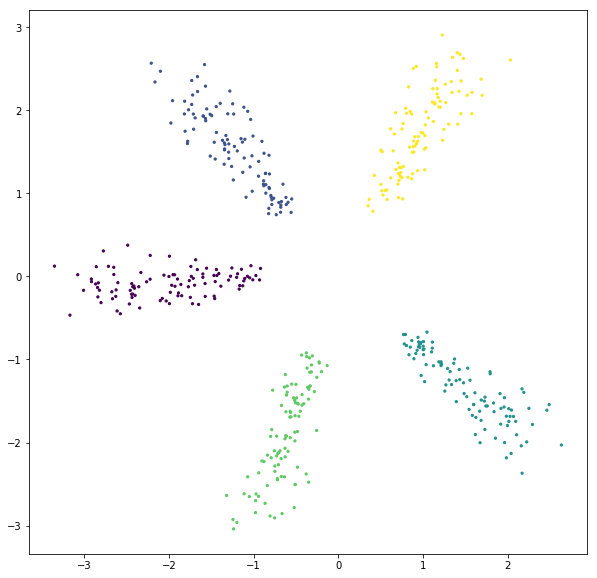

In [142]:
%matplotlib inline

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], s=5, c=Y)
plt.show()
fig.savefig('./logistic_5class_data.png')

In [143]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [144]:
coef = logistic.coef_
print(coef.shape)

(5, 2)


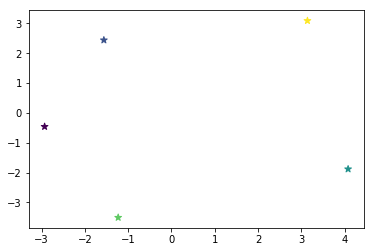

In [145]:
class_colors = np.asarray([i for i in range(coef.shape[0])])
plt.scatter(coef[:,0], coef[:,1], s=50, c=class_colors, marker='*')
plt.show()

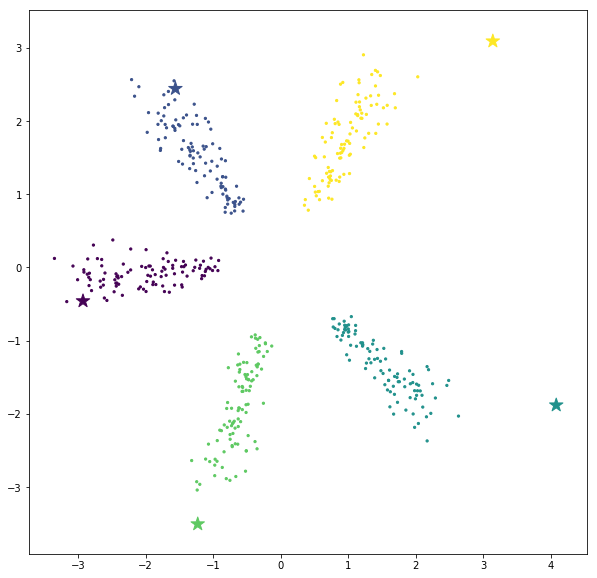

In [147]:
fig = plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], s=5, c=Y)
plt.scatter(coef[:,0], coef[:,1], s=200, c=class_colors, marker='*')
plt.show()
fig.savefig('./logistic_5class_data_w_classvector.png')

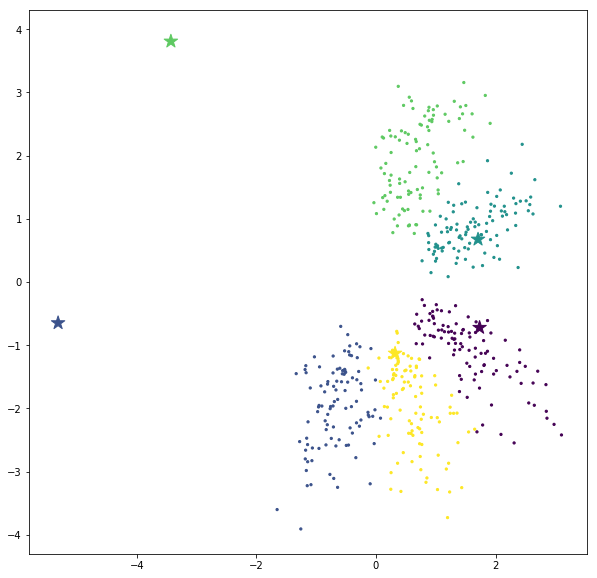

In [149]:
# 좀 더 퍼진 데이터로 클래스 벡터 학습하기

X = np.loadtxt('./data{}_X.csv'.format(2))
Y = np.loadtxt('./data{}_Y.csv'.format(2))

logistic = LogisticRegression()
logistic.fit(X, Y)
coef = logistic.coef_

fig = plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], s=5, c=Y)
plt.scatter(coef[:,0], coef[:,1], s=200, c=class_colors, marker='*')
plt.show()
fig.savefig('./logistic_5class_oneside_data_w_classvector.png')

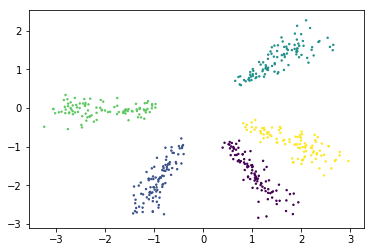

In [130]:
# 좀 더 퍼진 데이터로 클래스 벡터 학습하기

X, Y = generate_spherical(n_class=5, n_per_class=100,
    dimension=2, direction_perturbation_factor=0.2)

plt.scatter(X[:,0], X[:,1], s=2, c=Y)
plt.show()

In [131]:
save_data('./', 'data3', X, Y)

In [126]:
def save_data(directory, header, X, Y):
    import numpy as np
    np.savetxt('{}/{}_X.csv'.format(directory, header), X)
    np.savetxt('{}/{}_Y.csv'.format(directory, header), Y)

save_data('./', 'data2', X, Y)

In [ ]:
logistic.f

In [133]:
LogisticRegression?

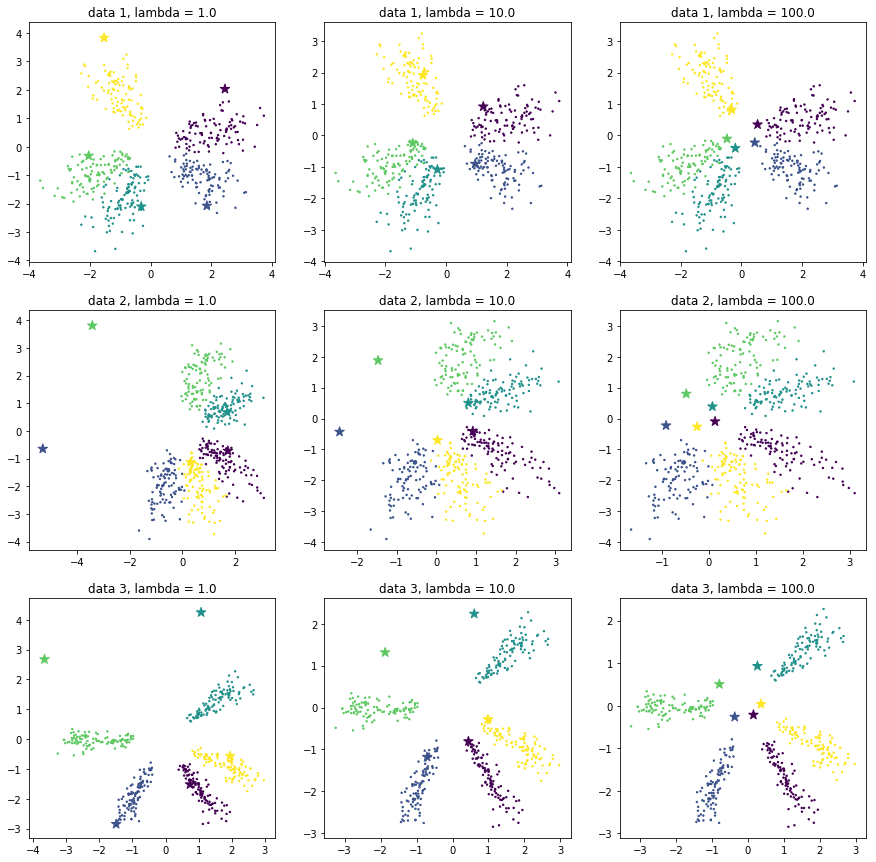

In [150]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

costs = [1, 0.1, 0.01]

for i in range(3):
    X = np.loadtxt('./data{}_X.csv'.format(i+1))
    Y = np.loadtxt('./data{}_Y.csv'.format(i+1))
    for j, C in enumerate(costs):
        logistic = LogisticRegression(C=C, penalty='l2')
        logistic.fit(X, Y)
        coef = logistic.coef_
        
        idx = i * 3 + j + 1
        plt.subplot(3,3,idx)
        plt.scatter(X[:,0], X[:,1], s=2, c=Y)
        plt.scatter(coef[:,0], coef[:,1], s=100, c=class_colors, marker='*')
        plt.title('data {}, lambda = {}'.format(i+1, 1/C))
    
plt.show()

In [151]:
fig.savefig('logistic_l2_regularization.png')

In [115]:
# 5 차원의 데이터로 10 개 클래스 만들어서 2차원 t-sne / PCA 이용해서 시각화 하기
X, Y = generate_spherical(n_class=5, n_per_class=100, dimension=5)

logistic = LogisticRegression()
logistic.fit(X, Y)
coef = logistic.coef_
print(coef.shape)

(5, 5)


In [117]:
X_ = np.concatenate((X, coef))
X_.shape

(505, 5)

In [118]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
Z = tsne.fit_transform(X_)

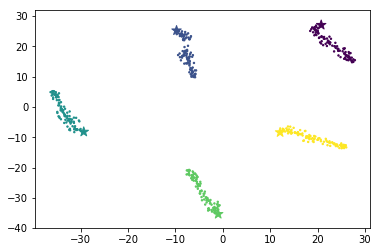

In [120]:
plt.scatter(Z[:500,0], Z[:500,1], s=2, c=Y)
plt.scatter(Z[500:,0], Z[500:,1], s=100, c=class_colors, marker='*')
plt.show()

## Regularization

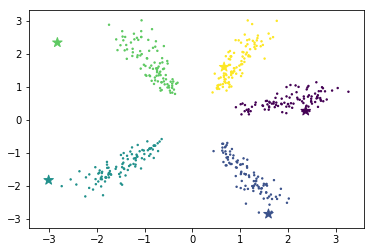

In [112]:
logistic = LogisticRegression(C=0.5)
logistic.fit(X, Y)
coef = logistic.coef_
plt.scatter(X[:,0], X[:,1], s=2, c=Y)
plt.scatter(coef[:,0], coef[:,1], s=100, c=class_colors, marker='*')
plt.show()

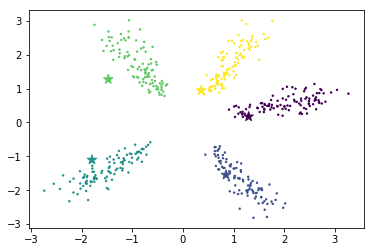

In [111]:
logistic = LogisticRegression(C=0.1)
logistic.fit(X, Y)
coef = logistic.coef_
plt.scatter(X[:,0], X[:,1], s=2, c=Y)
plt.scatter(coef[:,0], coef[:,1], s=100, c=class_colors, marker='*')
plt.show()

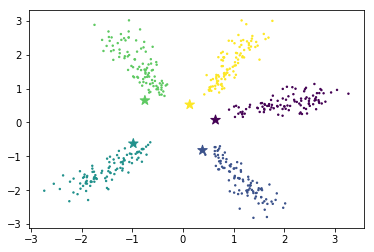

In [114]:
logistic = LogisticRegression(C=0.02)
logistic.fit(X, Y)
coef = logistic.coef_
plt.scatter(X[:,0], X[:,1], s=2, c=Y)
plt.scatter(coef[:,0], coef[:,1], s=100, c=class_colors, marker='*')
plt.show()

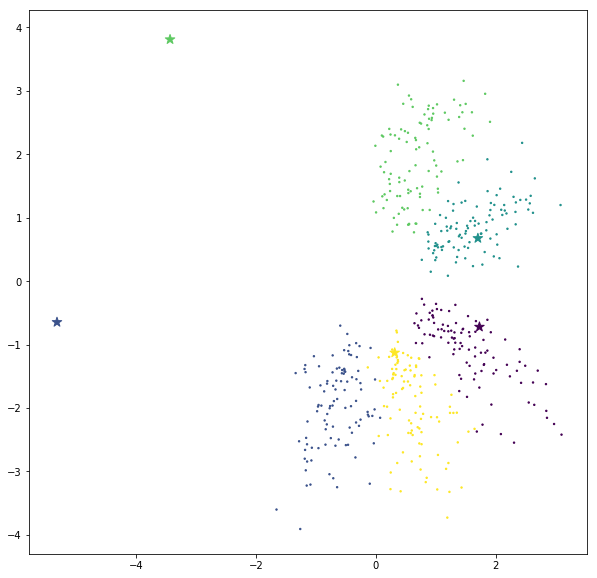

In [95]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

X = np.loadtxt('data2_X.csv')
Y = np.loadtxt('data2_Y.csv')

logistic = LogisticRegression(C=1)
logistic.fit(X, Y)
coef = logistic.coef_

class_colors = np.asarray([i for i in range(coef.shape[0])])
fig = plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], s=2, c=Y)
plt.scatter(coef[:,0], coef[:,1], s=100, c=class_colors, marker='*')
plt.show()
fig.savefig('logistic_sklearn.png')

In [86]:
# cross entropy of softmax
def get_loss(X, class_vector):
    exp = np.exp(np.inner(X, class_vector))
    softmax = exp.max(axis=1) / exp.sum(axis=1)
    loss = - softmax.sum() / X.shape[0]
    return loss

def get_cost(loss, coef, C):
    cost = loss + C * np.sqrt((coef ** 2).sum(axis=1)).sum()
    return cost

C = 1.0
loss = get_loss(X, coef)
cost = loss + C * np.sqrt((coef ** 2).sum(axis=1)).sum()
print('loss = {}, cost={}'.format(loss, cost))

loss = -0.7294536429370001, cost=14.63660219793613


In [62]:
mean_vector = np.zeros((coef.shape[0], X.shape[1]))
for c in range(coef.shape[0]):
    mean_vector[c] = X[np.where(Y == c)[0]].mean(axis=0)

loss = -0.6130506054827283, cost=9.318440894827589


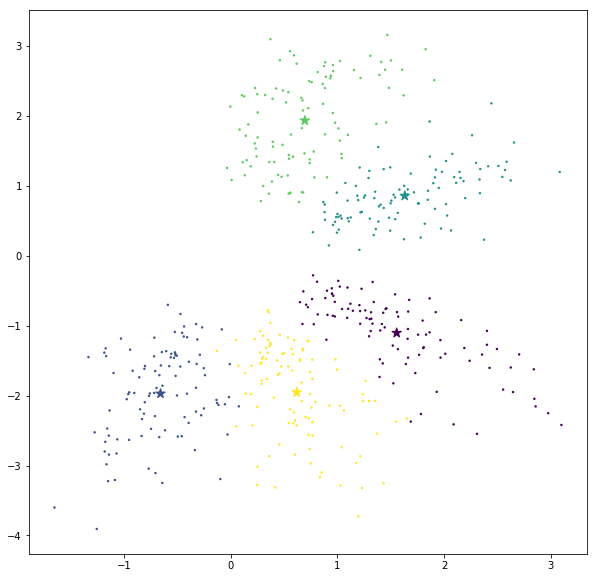

In [85]:
factor = 1
C = 1.0
loss = get_loss(X, mean_vector * factor)
cost = loss + C * np.sqrt((mean_vector ** 2).sum(axis=1)).sum()
print('loss = {}, cost={}'.format(loss, cost))

fig = plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], s=2, c=Y)
plt.scatter(mean_vector[:,0], mean_vector[:,1], s=100, c=class_colors, marker='*')
plt.show()
fig.savefig('logistic_meanx.png')

![](http://ufldl.stanford.edu/wiki/images/math/7/6/3/7634eb3b08dc003aa4591a95824d4fbd.png)

$ \sum_{i=1}^{m} =$

$cost = -\frac{1}{m} \left[ \sum_{i=1}^{m}\sum_{j=1}^{k} 1 \{y^i = j\} log \frac{exp(\theta_j^Tx^i)}{ \sum_{l=1}^{k} exp(\theta_l^Tx^i) } \right] + \lambda \parallel \theta \parallel_2$ 

$\begin{bmatrix} P(y=1~\vert~x) \\ \cdots \\ P(y=n~\vert~x) \end{bmatrix} = \begin{bmatrix} \frac{exp(-\theta_1^Tx)}{\sum_k exp(-\theta_k^Tx)} \\ \cdots \\ \frac{exp(-\theta_n^Tx)}{\sum_k exp(-\theta_k^Tx)} \end{bmatrix}$

loss = -0.6531676073574427, cost=11.264622193014937


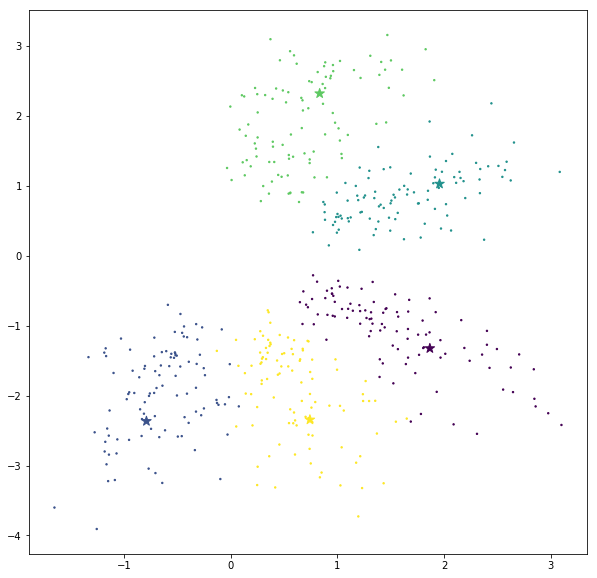

In [94]:
factor = 1.2
C = 1.0
loss = get_loss(X, mean_vector * factor)
cost = loss + C * np.sqrt(((factor*mean_vector) ** 2).sum(axis=1)).sum()
print('loss = {}, cost={}'.format(loss, cost))

fig = plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], s=2, c=Y)
plt.scatter(factor * mean_vector[:,0], factor * mean_vector[:,1], s=100, c=class_colors, marker='*')
plt.show()
fig.savefig('logistic_meanx1_2.png')

loss = -0.7024938477762388, cost=14.194743402689236


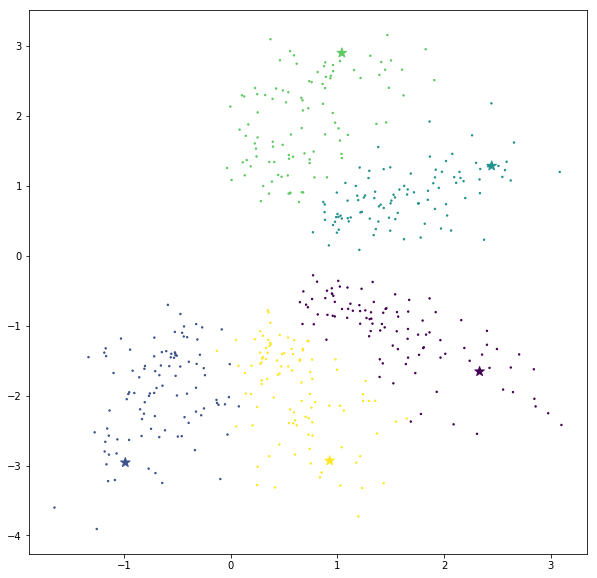

In [93]:
factor = 1.5
C = 1.0
loss = get_loss(X, mean_vector * factor)
cost = loss + C * np.sqrt(((factor*mean_vector) ** 2).sum(axis=1)).sum()
print('loss = {}, cost={}'.format(loss, cost))

fig = plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], s=2, c=Y)
plt.scatter(factor * mean_vector[:,0], factor * mean_vector[:,1], s=100, c=class_colors, marker='*')
plt.show()
fig.savefig('logistic_meanx1_5.png')

loss = -0.7643861839493887, cost=19.098596816671247


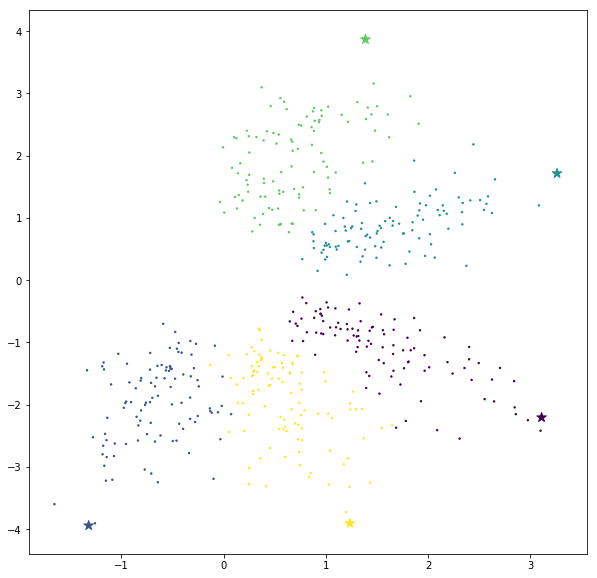

In [87]:
factor = 2
C = 1.0
loss = get_loss(X, mean_vector * factor)
cost = loss + C * np.sqrt(((factor*mean_vector) ** 2).sum(axis=1)).sum()
print('loss = {}, cost={}'.format(loss, cost))
fig = plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], s=2, c=Y)
plt.scatter(factor * mean_vector[:,0],
            factor * mean_vector[:,1],
            s=100, c=class_colors, marker='*')
plt.show()
fig.savefig('logistic_meanx2.png')

loss = -0.84235934599496, cost=28.95211515493599


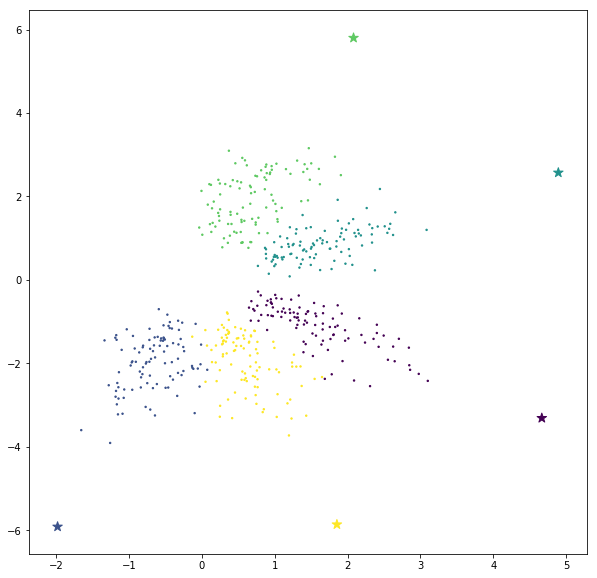

In [88]:
factor = 3
C = 1.0
loss = get_loss(X, mean_vector * factor)
cost = loss + C * np.sqrt(((factor*mean_vector) ** 2).sum(axis=1)).sum()
print('loss = {}, cost={}'.format(loss, cost))

fig = plt.figure(figsize=(10,10))
plt.scatter(X[:,0], X[:,1], s=2, c=Y)
plt.scatter(factor * mean_vector[:,0],
            factor * mean_vector[:,1],
            s=100, c=class_colors, marker='*')
plt.show()
fig.savefig('logistic_meanx3.png')

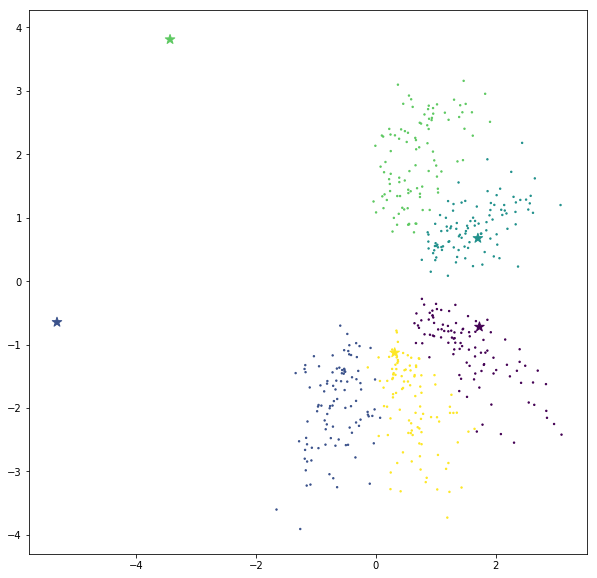

-0.729453642937


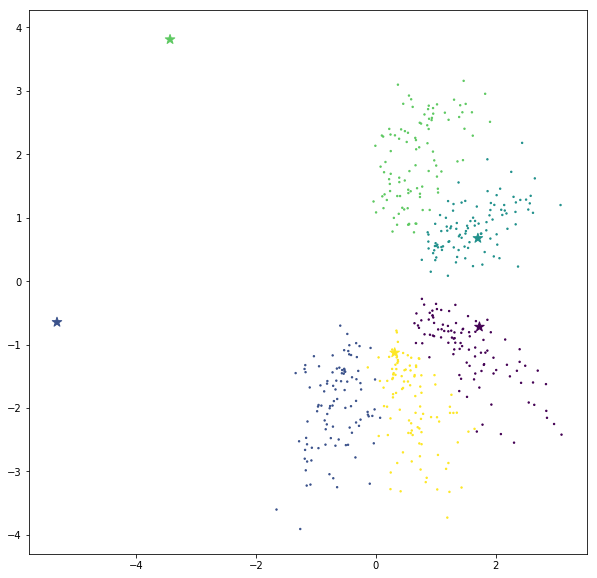

-0.729453642937


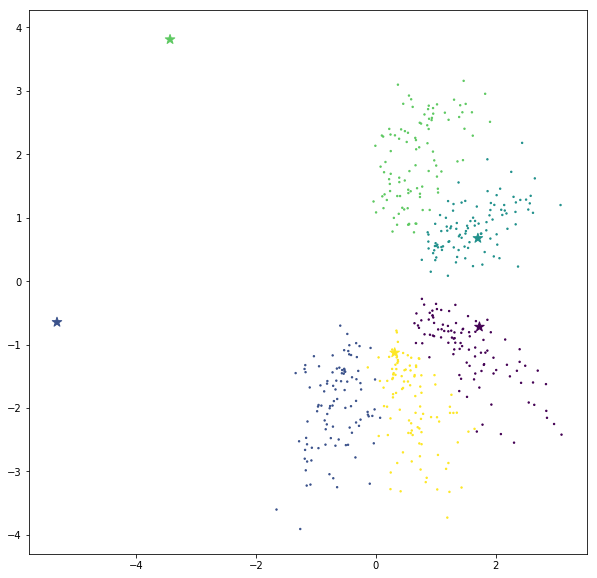

-0.729453642937


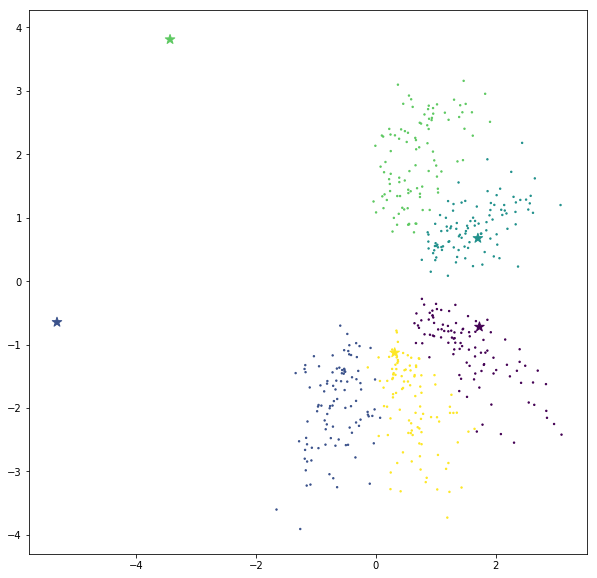

-0.729453642937


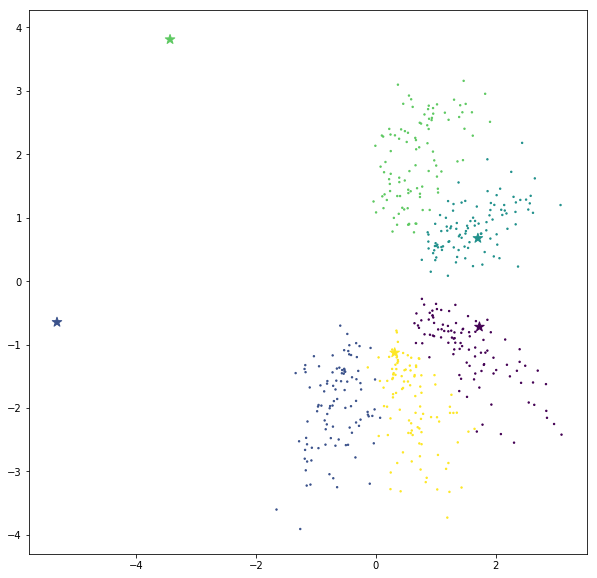

-0.729453642937


In [70]:
for r in [5, 5985, 23230, 355, 9864943]:
    logistic = LogisticRegression(C=1, tol=0.0000001, random_state=r)
    logistic.fit(X, Y)
    coef = logistic.coef_

    class_colors = np.asarray([i for i in range(coef.shape[0])])
    fig = plt.figure(figsize=(10,10))
    plt.scatter(X[:,0], X[:,1], s=2, c=Y)
    plt.scatter(coef[:,0], coef[:,1], s=100, c=class_colors, marker='*')
    plt.show()
    print(get_loss(X, coef))